In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002879C91DBA8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002879C9CAAC8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002879C9CAA90>)

In [3]:
print("Shape of Train Data",mnist.train.images.shape)
print("Shape of Test Data",mnist.test.images.shape)
print("Shape Validation Data",mnist.validation.images.shape)

Shape of Train Data (55000, 784)
Shape of Test Data (10000, 784)
Shape Validation Data (5000, 784)


In [4]:
print("Shape of Train labels", mnist.train.labels.shape)
print("Shape of Test labels", mnist.test.labels.shape)

Shape of Train labels (55000, 10)
Shape of Test labels (10000, 10)


In [5]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

<function matplotlib.pyplot.show(*args, **kw)>

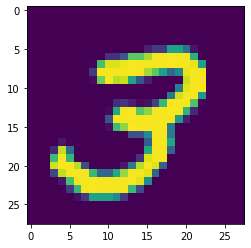

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig = mnist.train.images[67]
fig = np.array(fig, dtype="float")
fig = fig.reshape((28,28))
plt.imshow(fig)
plt.show

In [7]:
n_feature = 784
n_hidden1 = 256
n_hidden2 = 256
n_classes = 10

weight = {
    "h1": tf.Variable(tf.random.normal([n_feature, n_hidden1])),
    "h2": tf.Variable(tf.random.normal([n_hidden1, n_hidden2])),
    "out": tf.Variable(tf.random.normal([n_hidden2, n_classes]))
}

biases = {
    "h1": tf.Variable(tf.random.normal([n_hidden1])),
    "h2": tf.Variable(tf.random.normal([n_hidden2])),
    "out": tf.Variable(tf.random.normal([n_classes]))
}

In [44]:
def forward_propagation(x, weight, biases):
    in_layer_1 = tf.add(tf.matmul(x, weight["h1"]), biases["h1"])
    out_layer_1 = tf.nn.relu(in_layer_1)
    
    in_layer_2 = tf.add(tf.matmul(out_layer_1, weight["h2"]), biases["h2"])
    out_layer_2 = tf.nn.relu(in_layer_2)
    
    output = tf.add(tf.matmul(in_layer_2, weight["out"]), biases["out"])
    return output


In [45]:
x = tf.placeholder("float", [None, n_feature])
y = tf.placeholder(tf.int32, [None, n_classes])
prediciton = forward_propagation(x, weight, biases)

In [46]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediciton, labels=y))

In [47]:
omptimer = tf.train.AdamOptimizer(learning_rate=0.01)
omptimer_ = omptimer.minimize(cost)


In [48]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [64]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_batches = 0
    for j in range(num_batches):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        cost_, _ = sess.run([cost, omptimer_], feed_dict={x:x_batch, y:y_batch})
        total_batches += cost_
    print(total_batches)

3451.106092442991
2351.993520281417
1962.7513990562868
1860.1172312013805
1735.8572743598809
1498.1853793513728
1437.3798930881894
1028.4408898134716
838.58351104334
660.7157398462296
663.1444397782907
619.2677091807127
453.79436675459146
500.14588618278503
452.8252173513174
459.19861041009426
481.2160394191742
429.9646956026554
415.14957381784916
395.67155872285366
384.86418034136295
357.06369648873806
460.46309596300125
378.94882264733315
343.5851936042309


In [65]:
arg_pred = tf.argmax(prediciton, 1)
arg_actual = tf.argmax(y, 1)
actual_pred = tf.equal(arg_pred, arg_actual)

In [66]:
arg_pred_, arg_actual, actual_pred_ = sess.run([arg_pred, arg_actual, actual_pred], feed_dict={x:mnist.train.images, y:mnist.train.labels})
arg_pred_, arg_actual, actual_pred_

(array([2, 7, 1, ..., 0, 3, 6], dtype=int64),
 array([2, 7, 1, ..., 0, 3, 6], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [67]:
import pandas as pd
pd.value_counts(actual_pred_)

True     48633
False     6367
dtype: int64